All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

> In our lab, printing the entire set of scraped data is acceptable because we are trying to inspect and make sense of it. However, when working on the homework assignment, we should avoid printing out the entire output. First, test your XPaths; if they work, save the scraped data using append() and convert it to a DataFrame. We can then display the first five rows using df.head().

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

# HW: Capture data from the web & Business intelligence


**Instructions**

- Rename as **yourlastname_firstinitial_ HW_WebScraping_DataCollection_s.ipynb**
- In a real-world data analytics project, you should write **df.head()** or something similar (e.g., df.head(2)). **Never write df since this would print thousands or millions of rows**.
- The final data should be 253 rows. Some players do not have the information about Age, Pass_cmp, Pass_att, and College.
- Complete Jupyter notebook in **HTML version**. Download as HTML (yourlastname_firstinitial_HW_ WebScraping_DataCollection_s.html)
- This HW is **almost same as Example #3 and #4** in the lab.
- If you have questions, use the discussion forum. **Posting a large chunk of code is NOT allowed**. Also, take advantage of my (and TA's) office hours and reach out to me and TA by email.

**Background**

Data collection is one of the first activities you do when working on a data analytics project. As you know, there are different methods for data collection. Some methods are traditional, including surveys, interviews, and requesting data sets to the IT department.  New methods are getting popular as digital data are available online and through APIs (application programming interface). Web scraping (or crawling) is a powerful computational method for collecting data from websites.

This project deals with collecting data (“Web Scraping”). You will also learn how to process (or clean) and extract some descriptive statistics from the scraped data. Thus, this project involves both data collection, basic data transformation, and exploratory data analysis.

```Note```: The final data should be 253 rows. Some players do not have the information about Age, Pass_cmp, Pass_att, and College. 

The website (http://www.pro-football-reference.com/draft/) provides the complete data for NFL and AFL draft history. As a data (business) analyst, your role is to collect the complete data of 2017 NFL and AFL draft history from http://www.pro-football-reference.com/years/2017/draft.htm

## Capture football data

http://www.pro-football-reference.com/years/2017/draft.htm

You need to collect the following data: pick, player, pos (position), age, G (games played), Cmp (passes completed), Att (passes attempted), and college. The collected data should be converted to a data frame (Excel-like format). Therefore, the final dataset should contain eight columns.

<img src='images/webscraping_project_output.png'>

In [64]:
# Python packages for web scraping
import requests
from lxml import html

import pandas as pd
import numpy as np

# python package for data visualization
%matplotlib inline
import matplotlib.pyplot as plt

# show 1000 rows
pd.set_option('display.max_rows', 1000)

# ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# connecting to the website
r = requests.get('https://www.pro-football-reference.com/years/2017/draft.htm')
data = html.fromstring(r.text)

In [3]:
# develop Xpaths and collect data

finaldata =[]

for i in data.xpath("//tbody/tr"):
    pick = i.xpath("td[1]/text()")
    player = i.xpath("td[3]/@csk")
    position = i.xpath("td[4]/text()")
    age = i.xpath("td[5]/text()")
    G = i.xpath("td[12]/text()")
    cmp = i.xpath("td[13]/text()")
    att = i.xpath("td[14]/text()")
    college = i.xpath("td[27]/a/text()")
    finaldata.append([pick, player, position, age, G, cmp, att, college])
    
len(finaldata)

259

In [4]:
# inspect initial rows of the list data 
finaldata[:2]

[[['1'],
  ['Garrett,Myles'],
  ['DE'],
  ['21'],
  ['100'],
  ['0'],
  ['0'],
  ['Texas A&M']],
 [['2'],
  ['Trubisky,Mitchell'],
  ['QB'],
  ['23'],
  ['69'],
  ['1200'],
  ['1872'],
  ['North Carolina']]]

## Data understanding & Business intelligence

### Data cleaning & preparation

In [5]:
# convert the collected data to dataframe and view first five rows
df = pd.DataFrame(finaldata)
df.head()

,0,1,2,3,4,5,6,7
0,[1],"[Garrett,Myles]",[DE],[21],[100],[0],[0],[Texas A&M]
1,[2],"[Trubisky,Mitchell]",[QB],[23],[69],[1200],[1872],[North Carolina]
2,[3],"[Thomas,Solomon]",[DE],[22],[99],[0],[0],[Stanford]
3,[4],"[Fournette,Leonard]",[RB],[22],[81],[0],[2],[LSU]
4,[5],"[Davis,Corey]",[WR],[22],[78],[0],[0],[Western Michigan]


In [6]:
# remove bracket
for col in df.columns:
    df[col] = df[col].str[0]

In [7]:
# inspect the data after bracket removal 
df.head()

,0,1,2,3,4,5,6,7
0,1,"Garrett,Myles",DE,21,100,0,0,Texas A&M
1,2,"Trubisky,Mitchell",QB,23,69,1200,1872,North Carolina
2,3,"Thomas,Solomon",DE,22,99,0,0,Stanford
3,4,"Fournette,Leonard",RB,22,81,0,2,LSU
4,5,"Davis,Corey",WR,22,78,0,0,Western Michigan


In [8]:
# remove empty rows
df = df.dropna(how='all').reset_index(drop=True)  # reset index to start at zero
df.head()

,0,1,2,3,4,5,6,7
0,1,"Garrett,Myles",DE,21,100,0,0,Texas A&M
1,2,"Trubisky,Mitchell",QB,23,69,1200,1872,North Carolina
2,3,"Thomas,Solomon",DE,22,99,0,0,Stanford
3,4,"Fournette,Leonard",RB,22,81,0,2,LSU
4,5,"Davis,Corey",WR,22,78,0,0,Western Michigan


In [9]:
# how many rows?
print("The numbe of rows is: ", len(df))

The numbe of rows is:  253


### Rename the column names (e.g., 0 to Pick, 1 to Player)

In [10]:
df=df.rename(columns={0: 'Pick', 1: 'Player', 2: 'Pos', 3: 'Age', 4: 'G', 5: 'Cmp', 6: 'Att', 7: 'College'})
df.head(10)

,Pick,Player,Pos,Age,G,Cmp,Att,College
0,1,"Garrett,Myles",DE,21,100,0,0,Texas A&M
1,2,"Trubisky,Mitchell",QB,23,69,1200,1872,North Carolina
2,3,"Thomas,Solomon",DE,22,99,0,0,Stanford
3,4,"Fournette,Leonard",RB,22,81,0,2,LSU
4,5,"Davis,Corey",WR,22,78,0,0,Western Michigan
5,6,"Adams,Jamal",S,21,80,0,0,LSU
6,7,"Williams,Mike",WR,22,88,0,0,Clemson
7,8,"McCaffrey,Christian",RB,21,91,2,4,Stanford
8,9,"Ross,John",WR,21,37,0,0,Washington
9,10,"Mahomes,Patrick",QB,21,96,2386,3590,Texas Tech


### Check the data types. You will find out that all columns are object or string.

In [11]:
#Information on data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pick     253 non-null    object
 1   Player   253 non-null    object
 2   Pos      253 non-null    object
 3   Age      253 non-null    object
 4   G        231 non-null    object
 5   Cmp      231 non-null    object
 6   Att      231 non-null    object
 7   College  253 non-null    object
dtypes: object(8)
memory usage: 15.9+ KB


### Convert three columns (G, Cmp, and Att) to numbers. What are the data types of G, Cmp, and Att after type conversion?

In [12]:
#convert object to number
df[['G', 'Cmp', 'Att']] = df[['G', 'Cmp', 'Att']].apply(pd.to_numeric)

In [13]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pick     253 non-null    object 
 1   Player   253 non-null    object 
 2   Pos      253 non-null    object 
 3   Age      253 non-null    object 
 4   G        231 non-null    float64
 5   Cmp      231 non-null    float64
 6   Att      231 non-null    float64
 7   College  253 non-null    object 
dtypes: float64(3), object(5)
memory usage: 15.9+ KB


The data types of G, Cmp, and Att is float64

In [14]:
# to view all rows
pd.set_option('display.max_rows', 500)

### Calculate a new column (“PassCompletionRate”) = Cmp /Att

In [15]:
df['Pass Completion Rate'] = df['Cmp'] / df['Att']
df.head()

,Pick,Player,Pos,Age,G,Cmp,Att,College,Pass Completion Rate
0,1,"Garrett,Myles",DE,21,100.0,0.0,0.0,Texas A&M,NaN
1,2,"Trubisky,Mitchell",QB,23,69.0,1200.0,1872.0,North Carolina,0.641026
2,3,"Thomas,Solomon",DE,22,99.0,0.0,0.0,Stanford,NaN
3,4,"Fournette,Leonard",RB,22,81.0,0.0,2.0,LSU,0.000000
4,5,"Davis,Corey",WR,22,78.0,0.0,0.0,Western Michigan,NaN


### Find out the top five players in terms of games played (Display the output in the notebook): The output should show only five players. 

Hint: df.head(5) displays five rows; df.head(10) displays ten rows;

In [16]:
# sort values to find top five players
df.sort_values('G', ascending = False).head()

,Pick,Player,Pos,Age,G,Cmp,Att,College,Pass Completion Rate
63,64,"Moton,Taylor",G,23,115.0,0.0,0.0,Western Michigan,NaN
12,13,"Reddick,Haason",LB,22,114.0,0.0,0.0,Temple,NaN
152,153,"Elliott,Jake",K,22,113.0,0.0,1.0,Memphis,0.0
124,125,"Ebukam,Samson",OLB,22,113.0,0.0,0.0,Eastern Washington,NaN
62,63,"Dawkins,Dion",G,23,112.0,0.0,0.0,Temple,NaN


### Find out the top five players in terms of pass completion rate (Display the output in the notebook)

In [17]:
# sort values to find top five players
df.sort_values('Pass Completion Rate', ascending = False).head()

,Pick,Player,Pos,Age,G,Cmp,Att,College,Pass Completion Rate
171,172,"McKenzie,Isaiah",WR,22,93.0,1.0,1.0,Georgia,1.000000
66,67,"Kamara,Alvin",RB,22,101.0,1.0,1.0,Tennessee,1.000000
123,124,"Reeves-Maybin,Jalen",LB,22,104.0,1.0,1.0,Tennessee,1.000000
117,118,"Hollins,Mack",WR,23,95.0,1.0,1.0,North Carolina,1.000000
118,119,"Cohen,Tarik",RB,22,51.0,2.0,3.0,North Carolina A&T,0.666667


### Find out the top ten schools in terms of the number of players drafted (Display the output in the notebook)

In [19]:
# sort values to find top five players
df.sort_values('College', ascending = False).head(10)

,Pick,Player,Pos,Age,G,Cmp,Att,College,Pass Completion Rate
166,167,"Moss,Avery",DE,22,22.0,0.0,0.0,Youngstown St.,NaN
82,83,"Rivers,Derek",DE,23,24.0,0.0,0.0,Youngstown St.,NaN
198,199,"Roullier,Chase",C,24,69.0,0.0,0.0,Wyoming,NaN
155,156,"Hill,Brian",RB,21,48.0,0.0,0.0,Wyoming,NaN
31,32,"Ramczyk,Ryan",T,23,101.0,0.0,0.0,Wisconsin,NaN
29,30,"Watt,T.J.",OLB,22,104.0,0.0,0.0,Wisconsin,NaN
107,108,"Biegel,Vince",LB,24,43.0,0.0,0.0,Wisconsin,NaN
63,64,"Moton,Taylor",G,23,115.0,0.0,0.0,Western Michigan,NaN
4,5,"Davis,Corey",WR,22,78.0,0.0,0.0,Western Michigan,NaN
247,248,"Adams,Keion",OLB,22,NaN,NaN,NaN,Western Michigan,NaN


### Who are former Kansas St. players? 

Show their information in Jupyter notebook Hint: ```Kansas St.``` appears in the College column. You would google a question (“pandas select rows with value”), and this will return a list of ```StackOverflow``` pages. Go to the first page and try the first solution (or the most popular solution).

In [22]:
#df.loc[df['column_name'] == some_value]
df.loc[df['College'] == 'Kansas St.']

,Pick,Player,Pos,Age,G,Cmp,Att,College,Pass Completion Rate
72,73,"Willis,Jordan",OLB,22,69.0,0.0,0.0,Kansas St.,NaN
231,232,"Lee,Elijah",LB,21,74.0,0.0,0.0,Kansas St.,NaN


### In your data, which position ("Pos") is most popular?

- Wide receiver? Center back? Outside linebacker?

In [45]:
df['Pos'].value_counts().head(1)

WR    32
Name: Pos, dtype: int64

#### Visualize the relation between and Passes completed  and player's age with a scatter plot

Text(0.5, 1.0, "Player's Age vs Completed Passes")

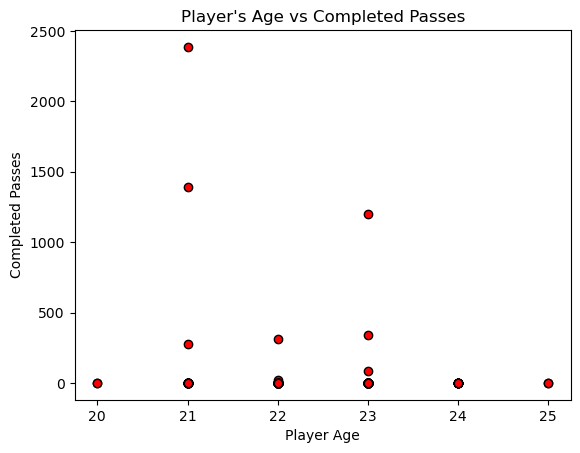

In [74]:
# Create a scatter plot 
plt.scatter(df['Age'], df['Cmp'], edgecolors= 'black', facecolors = 'red')
plt.xlabel('Player Age')
plt.ylabel('Completed Passes')
plt.title("Player's Age vs Completed Passes")

**Download this notebook as HTML and submit the HTML file.**